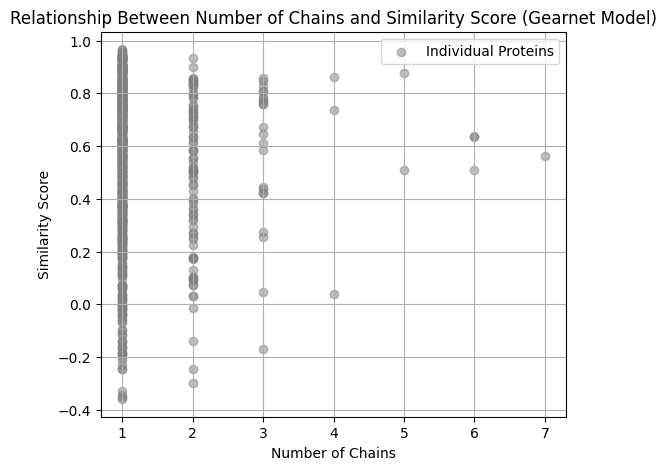

In [1]:
import json
import re
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the JSON files
with open("../workspace_data/similarity_scores_gearnet_gemma2.json", "r") as file1, \
     open("../workspace_data/similarity_scores_gvp_gemma2.json", "r") as file2, \
     open("../workspace_data/similarity_scores_scannet_gemma2.json", "r") as file3, \
     open("../workspace_data/similarity_scores_gat_gemma2.json", "r") as file4:
    gearnet_data = json.load(file1)
    gvp_data = json.load(file2)
    scannet_data = json.load(file3)
    gat_data = json.load(file4)

# Step 1: Find common proteins across all files
common_proteins = set(gearnet_data.keys()) & set(gvp_data.keys()) & set(scannet_data.keys()) & set(gat_data.keys())

chains_to_scores = defaultdict(list)

for protein_id in common_proteins:
    file_path = f"../content/protein_files/fasta/{protein_id}.fasta"
    with open(file_path, 'r') as file:
        fasta_text = file.read()
        lines = fasta_text.split('\n')
        chain_count = 0
        skip = False
        
        for line in lines:
            if line.startswith('>'):
                # Count the number of chains
                if 'Chain' in line and '[auth' not in line:
                    chain_count += 1
                # Skip protein if '[auth' is present
                elif '[auth' in line:
                    skip = True
                    break
        
        # Only record the count if the protein was not skipped
        if not skip and chain_count > 0:
            similarity_score = gearnet_data[protein_id]["similarity_score"]
            chains_to_scores[chain_count].append(similarity_score)

# Prepare data for linear regression and plotting
x_vals = []
y_vals = []

# Flatten the data for linear regression
for chains, scores in chains_to_scores.items():
    x_vals.extend([chains] * len(scores))
    y_vals.extend(scores)

# Step 3: Plot the original data and regression line
plt.figure(figsize=(6, 5))
plt.scatter(x_vals, y_vals, color='gray', alpha=0.5, label="Individual Proteins")

# Update labels
plt.xlabel('Number of Chains')
plt.ylabel('Similarity Score')
plt.title('Relationship Between Number of Chains and Similarity Score (Gearnet Model)')

# Show legend and plot
plt.legend()
plt.grid(True)
plt.show()


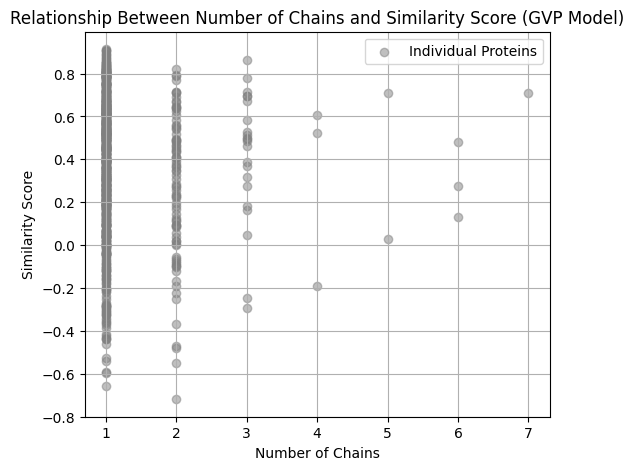

In [2]:
import json
import re
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the JSON files
with open("../workspace_data/similarity_scores_gearnet_gemma2.json", "r") as file1, \
     open("../workspace_data/similarity_scores_gvp_gemma2.json", "r") as file2, \
     open("../workspace_data/similarity_scores_scannet_gemma2.json", "r") as file3, \
     open("../workspace_data/similarity_scores_gat_gemma2.json", "r") as file4:
    gearnet_data = json.load(file1)
    gvp_data = json.load(file2)
    scannet_data = json.load(file3)
    gat_data = json.load(file4)

# Step 1: Find common proteins across all files
common_proteins = set(gearnet_data.keys()) & set(gvp_data.keys()) & set(scannet_data.keys()) & set(gat_data.keys())

chains_to_scores = defaultdict(list)

for protein_id in common_proteins:
    file_path = f"../content/protein_files/fasta/{protein_id}.fasta"
    with open(file_path, 'r') as file:
        fasta_text = file.read()
        lines = fasta_text.split('\n')
        chain_count = 0
        skip = False
        
        for line in lines:
            if line.startswith('>'):
                # Count the number of chains
                if 'Chain' in line and '[auth' not in line:
                    chain_count += 1
                # Skip protein if '[auth' is present
                elif '[auth' in line:
                    skip = True
                    break
        
        # Only record the count if the protein was not skipped
        if not skip and chain_count > 0:
            similarity_score = gvp_data[protein_id]["similarity_score"]
            chains_to_scores[chain_count].append(similarity_score)

# Prepare data for linear regression and plotting
x_vals = []
y_vals = []

# Flatten the data for linear regression
for chains, scores in chains_to_scores.items():
    x_vals.extend([chains] * len(scores))
    y_vals.extend(scores)

# Step 3: Plot the original data and regression line
plt.figure(figsize=(6, 5))
plt.scatter(x_vals, y_vals, color='gray', alpha=0.5, label="Individual Proteins")

# Update labels
plt.xlabel('Number of Chains')
plt.ylabel('Similarity Score')
plt.title('Relationship Between Number of Chains and Similarity Score (GVP Model)')

# Show legend and plot
plt.legend()
plt.grid(True)
plt.show()


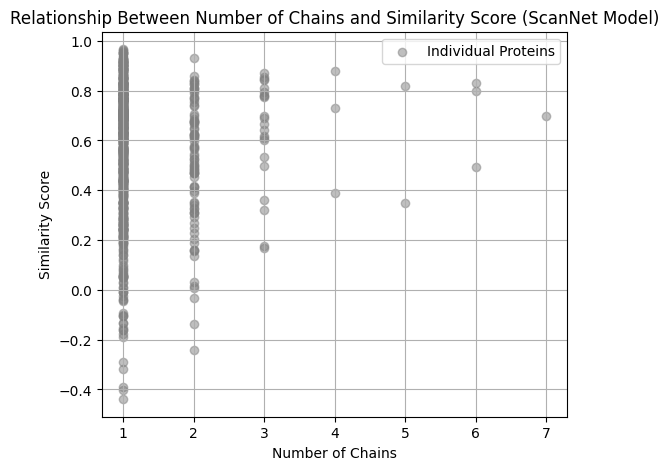

In [3]:
import json
import re
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the JSON files
with open("../workspace_data/similarity_scores_gearnet_gemma2.json", "r") as file1, \
     open("../workspace_data/similarity_scores_gvp_gemma2.json", "r") as file2, \
     open("../workspace_data/similarity_scores_scannet_gemma2.json", "r") as file3, \
     open("../workspace_data/similarity_scores_gat_gemma2.json", "r") as file4:
    gearnet_data = json.load(file1)
    gvp_data = json.load(file2)
    scannet_data = json.load(file3)
    gat_data = json.load(file4)

# Step 1: Find common proteins across all files
common_proteins = set(gearnet_data.keys()) & set(gvp_data.keys()) & set(scannet_data.keys()) & set(gat_data.keys())

chains_to_scores = defaultdict(list)

for protein_id in common_proteins:
    file_path = f"../content/protein_files/fasta/{protein_id}.fasta"
    with open(file_path, 'r') as file:
        fasta_text = file.read()
        lines = fasta_text.split('\n')
        chain_count = 0
        skip = False
        
        for line in lines:
            if line.startswith('>'):
                # Count the number of chains
                if 'Chain' in line and '[auth' not in line:
                    chain_count += 1
                # Skip protein if '[auth' is present
                elif '[auth' in line:
                    skip = True
                    break
        
        # Only record the count if the protein was not skipped
        if not skip and chain_count > 0:
            similarity_score = scannet_data[protein_id]["similarity_score"]
            chains_to_scores[chain_count].append(similarity_score)

# Prepare data for linear regression and plotting
x_vals = []
y_vals = []

# Flatten the data for linear regression
for chains, scores in chains_to_scores.items():
    x_vals.extend([chains] * len(scores))
    y_vals.extend(scores)

# Step 3: Plot the original data and regression line
plt.figure(figsize=(6, 5))
plt.scatter(x_vals, y_vals, color='gray', alpha=0.5, label="Individual Proteins")

# Update labels
plt.xlabel('Number of Chains')
plt.ylabel('Similarity Score')
plt.title('Relationship Between Number of Chains and Similarity Score (ScanNet Model)')

# Show legend and plot
plt.legend()
plt.grid(True)
plt.show()


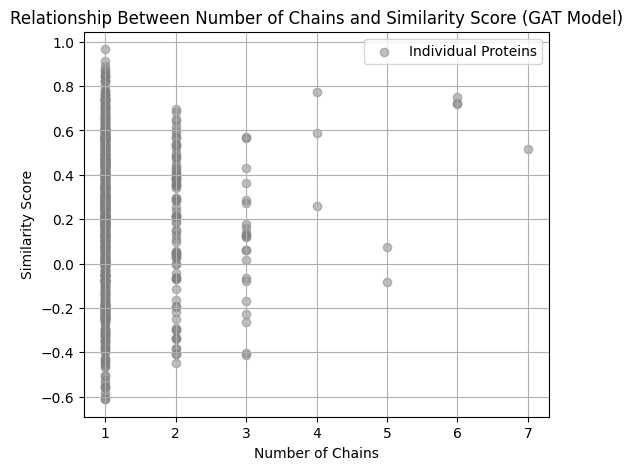

In [4]:
import json
import re
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the JSON files
with open("../workspace_data/similarity_scores_gearnet_gemma2.json", "r") as file1, \
     open("../workspace_data/similarity_scores_gvp_gemma2.json", "r") as file2, \
     open("../workspace_data/similarity_scores_scannet_gemma2.json", "r") as file3, \
     open("../workspace_data/similarity_scores_gat_gemma2.json", "r") as file4:
    gearnet_data = json.load(file1)
    gvp_data = json.load(file2)
    scannet_data = json.load(file3)
    gat_data = json.load(file4)

# Step 1: Find common proteins across all files
common_proteins = set(gearnet_data.keys()) & set(gvp_data.keys()) & set(scannet_data.keys()) & set(gat_data.keys())

chains_to_scores = defaultdict(list)

for protein_id in common_proteins:
    file_path = f"../content/protein_files/fasta/{protein_id}.fasta"
    with open(file_path, 'r') as file:
        fasta_text = file.read()
        lines = fasta_text.split('\n')
        chain_count = 0
        skip = False
        
        for line in lines:
            if line.startswith('>'):
                # Count the number of chains
                if 'Chain' in line and '[auth' not in line:
                    chain_count += 1
                # Skip protein if '[auth' is present
                elif '[auth' in line:
                    skip = True
                    break
        
        # Only record the count if the protein was not skipped
        if not skip and chain_count > 0:
            similarity_score = gat_data[protein_id]["similarity_score"]
            chains_to_scores[chain_count].append(similarity_score)

# Prepare data for linear regression and plotting
x_vals = []
y_vals = []

# Flatten the data for linear regression
for chains, scores in chains_to_scores.items():
    x_vals.extend([chains] * len(scores))
    y_vals.extend(scores)

# Step 3: Plot the original data and regression line
plt.figure(figsize=(6, 5))
plt.scatter(x_vals, y_vals, color='gray', alpha=0.5, label="Individual Proteins")

# Update labels
plt.xlabel('Number of Chains')
plt.ylabel('Similarity Score')
plt.title('Relationship Between Number of Chains and Similarity Score (GAT Model)')

# Show legend and plot
plt.legend()
plt.grid(True)
plt.show()
